In [153]:
import pandas as pd
import geopandas as gpd
from geopy.geocoders import Nominatim
from shapely.geometry import Point
import matplotlib.pyplot as pl
import requests
import numpy as np




In [154]:
# Call the USWTDB API and apply custom URL parameters to the request. Parameters allow us to filter the data return.
data_url = "https://eersc.usgs.gov/api/uswtdb/v1/turbines?&t_cap=gt.0&select=case_id,xlong,ylat,p_year"
# request the data and transfer to data frame 
response_data=requests.get(data_url)


# Parse the JSON response from the API return and populate the dataframe
data=response_data.json()
df=pd.json_normalize(data)


# Preview the first five records of our dataframe based on the custom URL paramters in the API request
display(df)


,case_id,xlong,ylat,p_year
0,3123985,-99.78703,36.50172,2022.0
1,3123544,-99.72562,36.43713,2022.0
2,3123887,-99.76972,36.44493,2022.0
3,3123765,-99.80706,36.51394,2022.0
4,3123814,-99.75848,36.44498,2022.0
...,...,...,...,...
69812,3003325,-162.55733,66.83433,2003.0
69813,3109704,-116.55776,33.89111,2020.0
69814,3110036,-116.55260,33.89020,2020.0
69815,3110328,-116.55264,33.89168,2020.0


In [155]:
df.dtypes

case_id      int64
xlong      float64
ylat       float64
p_year     float64
dtype: object

In [156]:
df.describe()

,case_id,xlong,ylat,p_year
count,6.981700e+04,69817.000000,69817.000000,69810.000000
mean,3.065007e+06,-99.436027,38.481179,2013.072726
std,3.436237e+04,10.725880,5.450534,6.545578
min,3.000020e+06,-171.713070,13.389380,1982.000000
25%,3.036077e+06,-102.337990,34.300930,2009.000000
50%,3.055175e+06,-98.991780,39.118550,2014.000000
75%,3.096398e+06,-94.978020,42.841690,2018.000000
max,3.131492e+06,144.722660,66.839910,2023.000000


In [118]:
df.shape

(69817, 4)

In [157]:
#show columns
df.columns

Index(['case_id', 'xlong', 'ylat', 'p_year'], dtype='object')

In [158]:
#check for duplicated value and NaN
df.loc[df.duplicated(subset=['case_id', 'xlong', 'ylat', 'p_year'])]
df=df.dropna()

df

,case_id,xlong,ylat,p_year
0,3123985,-99.78703,36.50172,2022.0
1,3123544,-99.72562,36.43713,2022.0
2,3123887,-99.76972,36.44493,2022.0
3,3123765,-99.80706,36.51394,2022.0
4,3123814,-99.75848,36.44498,2022.0
...,...,...,...,...
69811,3001855,-162.55158,66.83790,2003.0
69812,3003325,-162.55733,66.83433,2003.0
69813,3109704,-116.55776,33.89111,2020.0
69814,3110036,-116.55260,33.89020,2020.0


In [159]:
 df.dtypes


case_id      int64
xlong      float64
ylat       float64
p_year     float64
dtype: object

In [160]:
 df=df.rename(columns = {'xlong' : 'long', 'ylat' : 'lat'})
          
df.head(5)

,case_id,long,lat,p_year
0,3123985,-99.78703,36.50172,2022.0
1,3123544,-99.72562,36.43713,2022.0
2,3123887,-99.76972,36.44493,2022.0
3,3123765,-99.80706,36.51394,2022.0
4,3123814,-99.75848,36.44498,2022.0


In [173]:
df['p_year']=df['p_year'].astype(int)
df

KeyError: 'p_year'

In [174]:
# Assuming 'dfClusterMap' is your DataFrame with latitude and longitude columns
# Create a GeoDataFrame with point geometries
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
gdfClusterMap = gpd.GeoDataFrame(df, geometry=geometry)

# Set the CRS to EPSG:4326
gdfClusterMap.crs = 'EPSG:4326'

# Now you can perform a spatial join using gdfClusterMap as the GeoDataFrame
df = gpd.sjoin(gdfClusterMap,gdfClusterMap, how="left", predicate="within")

# 'result' will contain the spatially joined data



KeyError: 'long'

In [164]:
df.tail()

,case_id_left,long_left,lat_left,p_year_left,geometry,index_right,case_id_right,long_right,lat_right,p_year_right
69811,3001855,-162.55158,66.83790,2003,POINT (-162.55158 66.83790),69811,3001855,-162.55158,66.83790,2003
69812,3003325,-162.55733,66.83433,2003,POINT (-162.55733 66.83433),69812,3003325,-162.55733,66.83433,2003
69813,3109704,-116.55776,33.89111,2020,POINT (-116.55776 33.89111),69813,3109704,-116.55776,33.89111,2020
69814,3110036,-116.55260,33.89020,2020,POINT (-116.55260 33.89020),69814,3110036,-116.55260,33.89020,2020
69815,3110328,-116.55264,33.89168,2020,POINT (-116.55264 33.89168),69815,3110328,-116.55264,33.89168,2020


In [166]:
row_count = len(df)
print("Number of rows in the DataFrame:", row_count)

Number of rows in the DataFrame: 69810


In [167]:
unique_count = df.nunique()
print(unique_count)

case_id_left     69810
long_left        64745
lat_left         61032
p_year_left         39
geometry         69810
index_right      69810
case_id_right    69810
long_right       64745
lat_right        61032
p_year_right        39
dtype: int64


In [169]:
# Assuming 'result' is your GeoDataFrame
df.columns

# Print the column 


Index(['case_id_left', 'long_left', 'lat_left', 'p_year_left', 'geometry',
       'index_right', 'case_id_right', 'long_right', 'lat_right',
       'p_year_right'],
      dtype='object')

In [176]:
# Assuming 'df' is your DataFrame and 'state_column' is the name of the column with state information
state_counts = df.value_counts().reset_index()
state_counts.columns = ['State', 'Count']

# The resulting 'state_counts' DataFrame will contain state names and their corresponding counts
print(state_counts)

ValueError: Length mismatch: Expected axis has 11 elements, new values have 2 elements

In [59]:
state_counts.to_csv('state_counts.csv', index=False)

In [68]:
df3.head()

,case_id,long,lat,p_year,geometry,index_right,GEO_ID,STATE,NAME,LSAD,CENSUSAREA
0,3123985,-99.78703,36.50172,2022,POINT (-99.78703 36.50172),36.0,0400000US40,40,Oklahoma,,68594.921
1,3123544,-99.72562,36.43713,2022,POINT (-99.72562 36.43713),36.0,0400000US40,40,Oklahoma,,68594.921
2,3123887,-99.76972,36.44493,2022,POINT (-99.76972 36.44493),36.0,0400000US40,40,Oklahoma,,68594.921
3,3123765,-99.80706,36.51394,2022,POINT (-99.80706 36.51394),36.0,0400000US40,40,Oklahoma,,68594.921
4,3123814,-99.75848,36.44498,2022,POINT (-99.75848 36.44498),36.0,0400000US40,40,Oklahoma,,68594.921


In [70]:
columns_to_drop = ['case_id', 'long', 'lat', 'geometry', 'index_right', 'GEO_ID', 'STATE', 'LSAD', 'CENSUSAREA']
df4 = df3.drop(columns = columns_to_drop)

In [73]:
df4.head(5)

,p_year,NAME
0,2022,Oklahoma
1,2022,Oklahoma
2,2022,Oklahoma
3,2022,Oklahoma
4,2022,Oklahoma


In [74]:
min_value = result_df['p_year'].min()
max_value = result_df['p_year'].max()
print("Minimum value:", min_value)
print("Maximum value:", max_value)


Minimum value: 1982
Maximum value: 2023


In [75]:
df5 = df4['p_year'].isna().sum()

print("Number of NaN values in 'p_year':", df5)

Number of NaN values in 'p_year': 0


In [77]:
df4.head()

,p_year,NAME
0,2022,Oklahoma
1,2022,Oklahoma
2,2022,Oklahoma
3,2022,Oklahoma
4,2022,Oklahoma


In [78]:
df4.rename(columns={'NAME': 'State'}, inplace=True)

In [79]:
df4.head()

,p_year,State
0,2022,Oklahoma
1,2022,Oklahoma
2,2022,Oklahoma
3,2022,Oklahoma
4,2022,Oklahoma


In [99]:
# # Convert 'p_year' to integer using .loc to avoid the warning
# new_df.loc[:, 'p_year'] = new_df['p_year'].astype(int)

# Create a pivot table to count entries for each year for each unique 'NAME'
df5 = df4.pivot_table(index='State', columns='p_year', aggfunc='size', fill_value=0)

# # Convert all columns to integer using .loc
# pivot_df.loc[:, pivot_df.columns] = pivot_df.loc[:, pivot_df.columns].astype(int)

# Display the result
df5.head(5)


p_year,1982,1983,1984,1985,1986,1987,1988,1990,1991,1992,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
State,,,,,,,,,,,,,,,,,,,,,
Alaska,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
Arizona,0,0,0,0,0,0,0,0,0,0,...,0,15,0,0,0,0,125,0,0,57
Arkansas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
California,4,116,155,260,79,179,162,1,1,1,...,35,93,3,21,114,39,28,90,18,0
Colorado,0,0,0,0,0,0,0,0,0,0,...,153,232,34,36,299,27,398,99,66,0


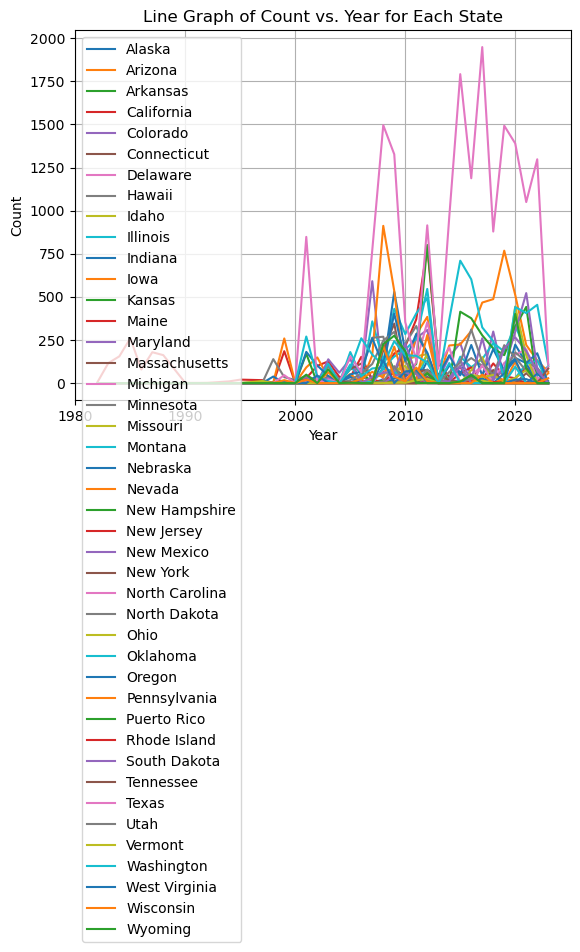

In [82]:
df6 = df5.T

# Plot a line graph for each state
for state in df6.columns:
    plt.plot(df6.index, df6[state], label=state)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Line Graph of Count vs. Year for Each State')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [85]:
# Create a new DataFrame with the same structure as pivot_df
df5 = df5.copy()

# Use cumsum to calculate the cumulative sum for each year
df7 = df5.cumsum(axis=1)

# Display the result
df7.head()

p_year,1982,1983,1984,1985,1986,1987,1988,1990,1991,1992,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
State,,,,,,,,,,,,,,,,,,,,,
Alaska,0,0,0,0,0,0,0,0,0,0,...,115,115,115,115,116,117,117,117,117,117
Arizona,0,0,0,0,0,0,0,0,0,0,...,127,142,142,142,142,142,267,267,267,324
Arkansas,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
California,4,120,275,535,614,793,955,956,957,958,...,3451,3544,3547,3568,3682,3721,3749,3839,3857,3857
Colorado,0,0,0,0,0,0,0,0,0,0,...,1631,1863,1897,1933,2232,2259,2657,2756,2822,2822


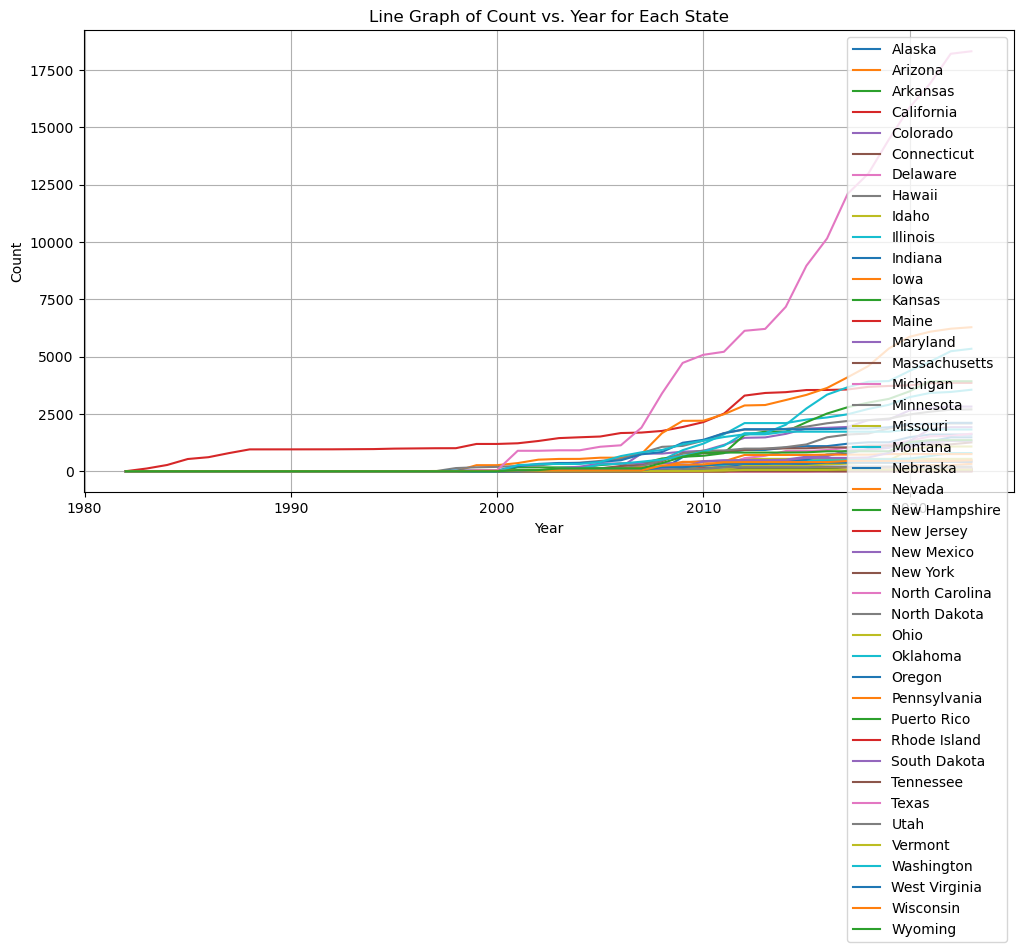

In [86]:
df8 = df7.T

# Create a larger figure by specifying the figsize parameter
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Plot a line graph for each state
for state in df8.columns:
    plt.plot(df8.index, df8[state], label=state)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Line Graph of Count vs. Year for Each State')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

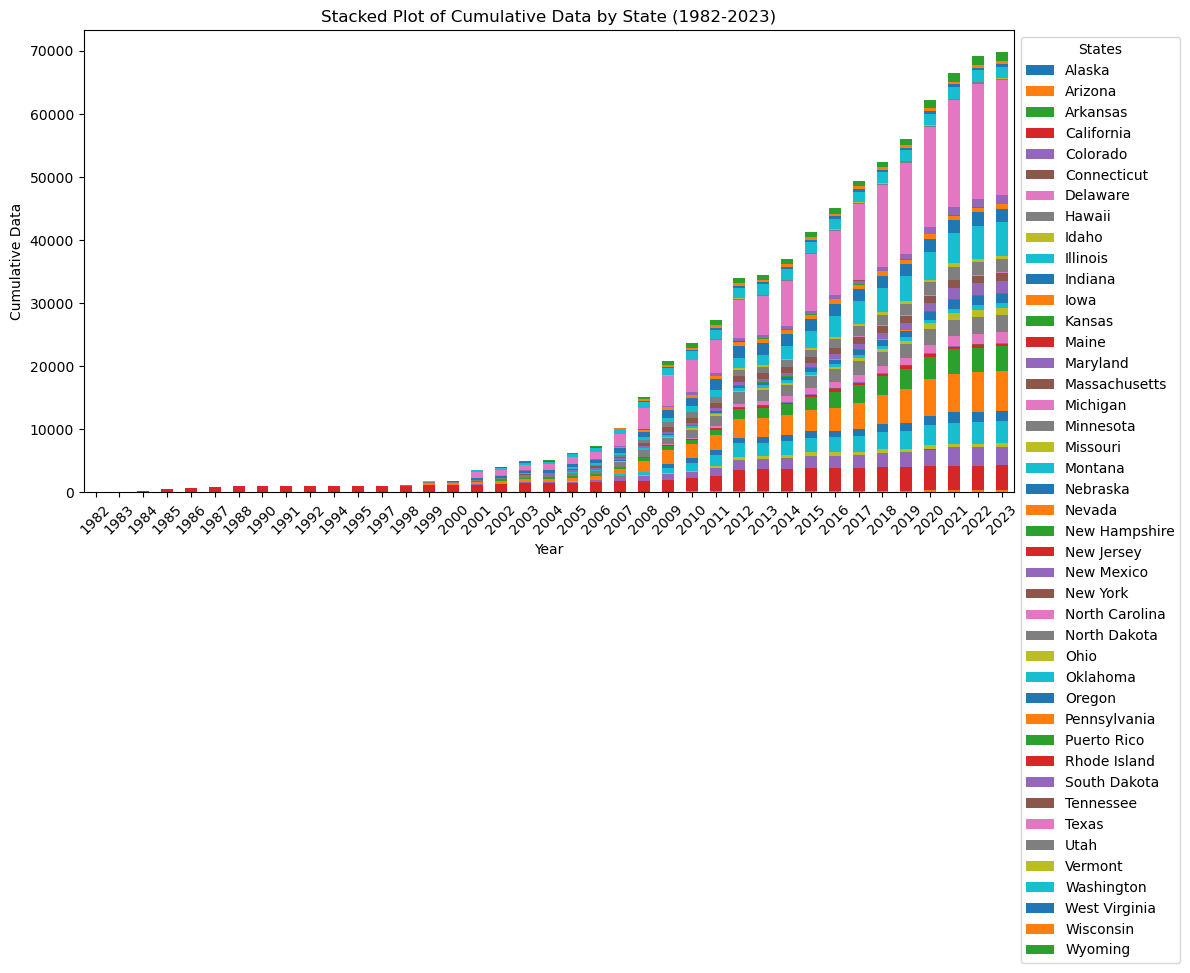

In [102]:
df7 = df7.transpose()

df7.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Stacked Plot of Cumulative Data by State (1982-2023)')
plt.xlabel('Year')
plt.ylabel('Cumulative Data')
plt.legend(title='States', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()


